# **My goal:**
The goal of this notebook is to conduct Exploratory Data Analysis (EDA), clean the data, and compare the performance of Logistic Regression, Random Forest, XGBoost, and SVM using different metric values. This is my first notebook, and I would appreciate any discussion here


## Import Data

In [1]:
#Importing

import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
#define dataset to variable "data"
data = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv")

#check first 5 raw
data.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# **Exploratory Data Analysis**

In [3]:
#before start EDA and plotting data i'll drop "enroll_id" column as we don't need it
data.drop("enrollee_id", axis=1, inplace=True)

In [4]:
#as in 1 plot data will very huge and massive i'll divide it on 2 plots 
#getting columns list, define 2 variables to list that was devided by 2
plot_list_1 = []
plot_list_2 = []
for column in data.columns:
    if len(plot_list_1)<=len(data.columns)/2:
        plot_list_1.append(column)
    else:
        plot_list_2.append(column)
print(plot_list_1)
print(plot_list_2)

['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline']
['experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


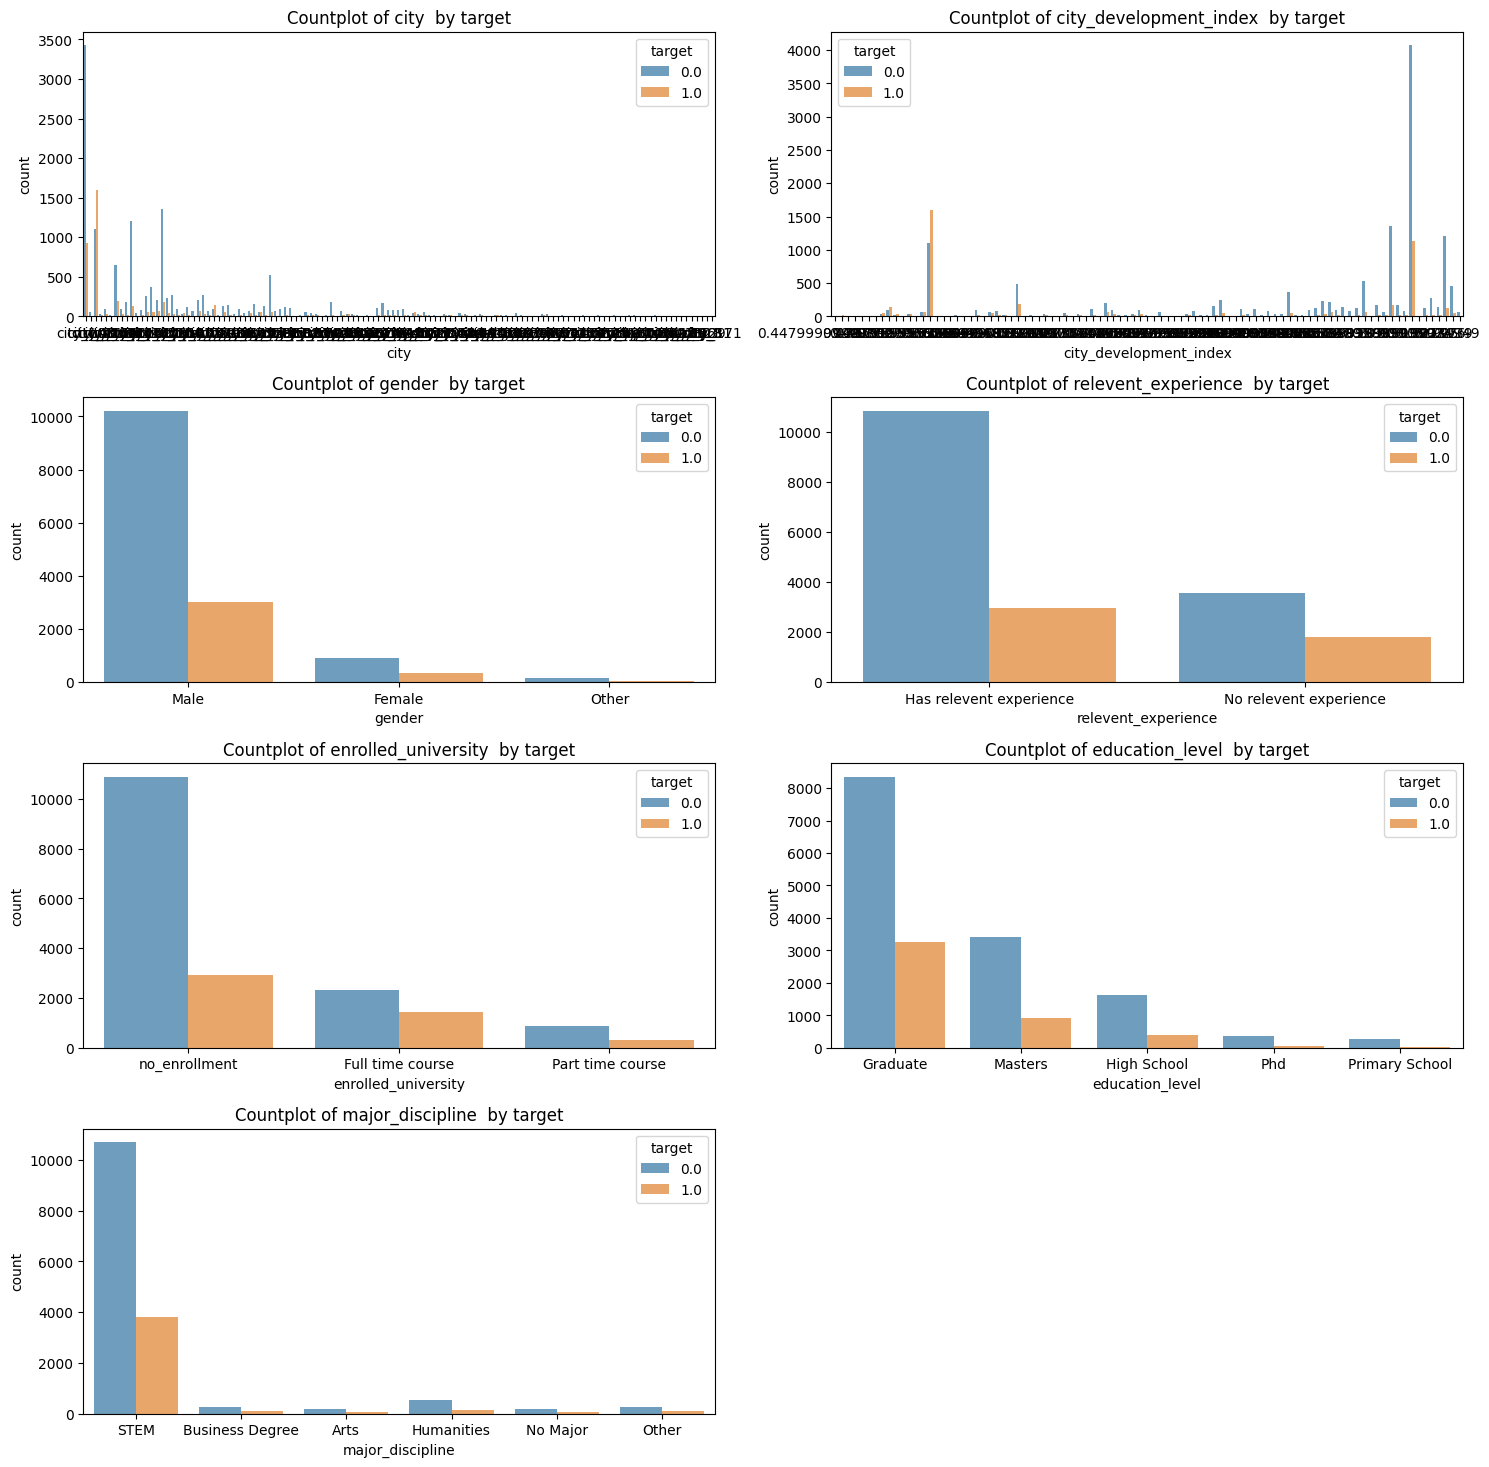

In [5]:

#Frequency of each category separated by label
plt.figure(figsize=[15,18])
features_1 = plot_list_1
n = 1
for f in features_1:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue="target", alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n = n + 1
plt.tight_layout()
plt.show()


# We can immediately see from the graphs above that the data is highly umbalanced. 
# That means that the class "1" in the target variable has way more records than the "0" class
# (a.k.a. that means that there are only a few records that are looking for a job change)
# This is certainly an obstacle for our analysis since our models will be biased toward the "0" class.

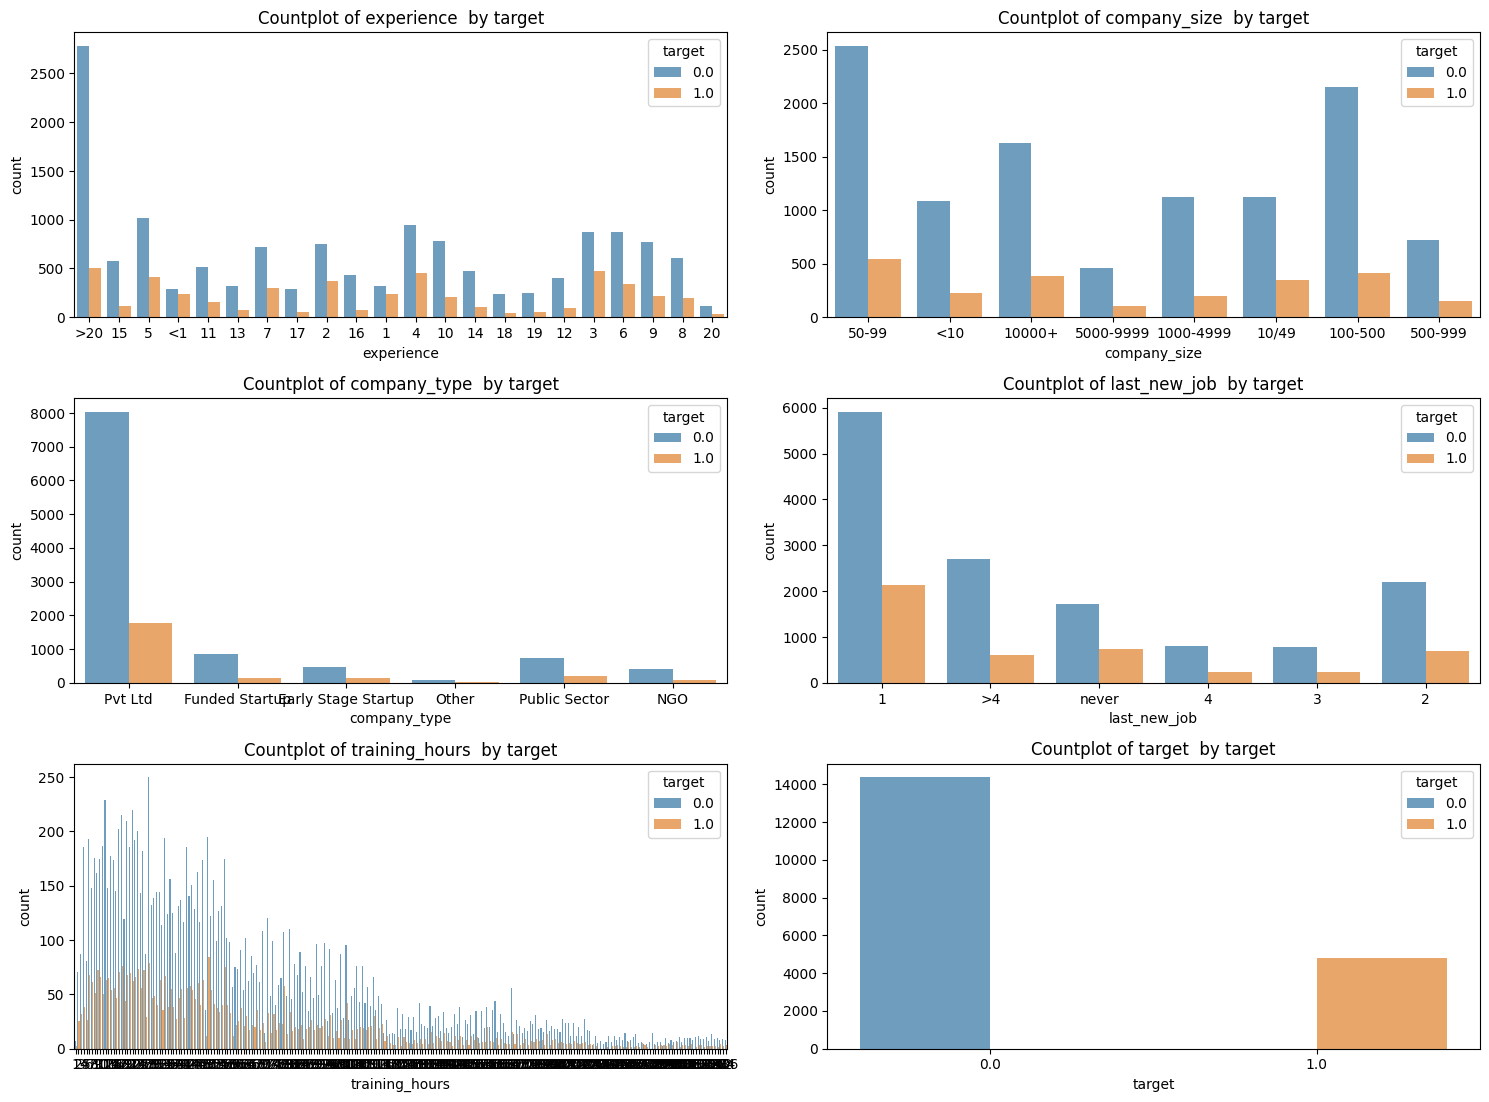

In [6]:

#Frequency of each category separated by label
plt.figure(figsize=[15,18])
features_2 = plot_list_2
n = 1
for f in features_2:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue="target", alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n = n + 1
plt.tight_layout()
plt.show()


# We can immediately see from the pgraphs above that the data is highly umbalanced. 
# That means that the class "1"lo in the target variable has way more records than the "0" class
# (a.k.a. that means that there are only a few records that are looking for a job change)
# This is certainly an obstacle for our analysis since our models will be biased toward the "0" class.

In [7]:
#How much unique values
for column in data.columns:
    print(column, data[column].nunique())

city 123
city_development_index 93
gender 3
relevent_experience 2
enrolled_university 3
education_level 5
major_discipline 6
experience 22
company_size 8
company_type 6
last_new_job 6
training_hours 241
target 2


In [8]:
#let`s what unique values inside dataset
for column in data.drop(["city", "city_development_index", 
                         "training_hours"], axis=1).columns:
    print(column, data[column].unique())


gender ['Male' nan 'Female' 'Other']
relevent_experience ['Has relevent experience' 'No relevent experience']
enrolled_university ['no_enrollment' 'Full time course' nan 'Part time course']
education_level ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
company_size [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_type [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job ['1' '>4' 'never' '4' '3' '2' nan]
target [1. 0.]


In [9]:
#let`s see how much unique values inside dataset
for column in data.drop(["city", "city_development_index",    #as values from this columns to much we drop it
                         "training_hours"], axis=1).columns:
    print(f"Unique values for column '{column}':")
    print(data[column].value_counts())
    print()

Unique values for column 'gender':
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

Unique values for column 'relevent_experience':
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

Unique values for column 'enrolled_university':
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

Unique values for column 'education_level':
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

Unique values for column 'major_discipline':
major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

Unique values for column 'experience':
experience
>20    3286
5      1430
4      1403
3      1354
6    

In [10]:
#Let`s see the ratio between classes
class_counts = data["target"].value_counts()
class_ratio = class_counts[1] / class_counts[0]


print(f"Ratio Class_1 to class_2: {class_ratio:.2f}")

Ratio Class_1 to class_2: 0.33


## **Data Preprocessing**

In [11]:
#Drop columns, and duplicates
#Filter data in columns "gender" and "city"

data.drop(["city_development_index","major_discipline", "enrolled_university", "education_level" ],  axis=1, inplace=True)
data.drop_duplicates(inplace=True)

data = data[data["gender"].map(data["gender"].value_counts()) > 200] # delete values < 200 in column it named as other 
data = data[data["city"].map(data["city"].value_counts()) > 30] # delete values < 30.

In [12]:
le = preprocessing.LabelEncoder()


# Imput the numerical missing values with the median and the categorical with the mode
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = data.select_dtypes(exclude=["int64", "float64"]).columns

for col in numerical_columns:
  data[col].fillna(data[col].median(), inplace=True)

for col in categorical_columns:
  data[col].fillna(data[col].mode()[0], inplace=True)

  #Encode variables
  data[col] = le.fit_transform(data[col])

/tmp/ipykernel_18/294979227.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipykernel_18/294979227.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

*After preprocessing we can see corelation*

<Axes: >

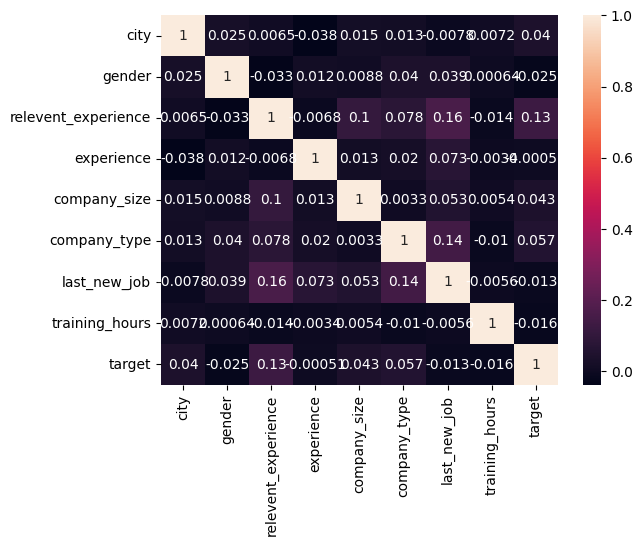

In [13]:
#Corelation
corelation = data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

## Train and Test Split

In [14]:
#Split data


from sklearn.model_selection import train_test_split


X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Selecting best hyperparameters for models**

In [15]:
#Logistic regression hyperparameters selection
#Here we cann add other one or muliple intuite values and GridSearchCV choose the best one

# 1st parametr is poly_degree - for polynomia features
# 2nd parameter is C for Logistic regression
param_grid = {
    'poly__degree': [2],  
    'l_r__C': [0.1]
}

#Building pipeline with scaler, polynomialfeatures and LogisticRegression
pipe = Pipeline ([("scaler", StandardScaler()), 
                  ("poly" ,PolynomialFeatures()),
                  ("l_r", LogisticRegression(solver='lbfgs', max_iter=100))])

grid_search = GridSearchCV(pipe, param_grid, cv=5)  # GridSearch parameters 

grid_search.fit(X_train, y_train)      # Fit it


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


score = grid_search.score(X_test, y_test)
print("Score on test data:", score)

Best Parameters: {'l_r__C': 0.1, 'poly__degree': 2}
Best Score: 0.7687864688936633
Score on test data: 0.7771260997067448


In [16]:
#Random Forest hyperparameters selection
#Here we cann add other one or muliple intuite values and GridSearchCV choose the best one

# parameters is for  RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100,],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [5],
    'class_weight': [None]
    
}

# GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5 )

#  GridSearchCV fit
grid_search.fit(X_train, y_train)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluating
score = grid_search.score(X_test, y_test)
print("Score on test data:", score)


Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7806083421892274
Score on test data: 0.7848240469208211


In [17]:
#SGD hyperparameters selection
#Here we cann add other one or muliple intuite values and GridSearchCV choose the best one

# parameters is for  SGDClassifier
sgd_clf = SGDClassifier()

#Building pipeline 
pipeline = Pipeline([
    
    ('sgd', sgd_clf)
])

#Parameters for SGDClassifier
param_grid = {
    'sgd__alpha': [0.001],
    'sgd__penalty': ['l1'],
    'sgd__class_weight': ['balanced']
}

#Define and fit Grid_search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train, )

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


score = grid_search.score(X_test, y_test)
print("Score on test data:", score)


Best Parameters: {'sgd__alpha': 0.001, 'sgd__class_weight': 'balanced', 'sgd__penalty': 'l1'}
Best Score: 0.6123466768668651
Score on test data: 0.39002932551319647


In [18]:
#XGBoost hyperparameters selection
#Here we cann add other one or muliple intuite values and GridSearchCV choose the best one

# parameters is for  XGBoost
param_grid = {
    'xgb__max_depth': [2],
    'xgb__min_child_weight': [2],
}

#Building pipeline 
pipe = Pipeline ([("scaler", StandardScaler()),                  
                  ("xgb", XGBClassifier())])

#Define and fit Grid_search
grid_search = GridSearchCV(pipe, param_grid, cv=5)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


score = grid_search.score(X_test, y_test)
print("Score on test data:", score)

Best Parameters: {'xgb__max_depth': 2, 'xgb__min_child_weight': 2}
Best Score: 0.7885809981554827
Score on test data: 0.7969208211143695


*Compare models with different metrics*

# **Compare models with different metrics**

In [19]:
# This block trains models from a list with their best parameters

# Ignore convergence warnings
import warnings
warnings.filterwarnings("ignore")

# List of metrics to compare models
metrics = ["roc_auc", "f1", "recall", "precision", "accuracy"]

# List of models to compare
names = ["LogisticRegression", "RandomForestClassifier", "SVM", "XGboost"]

# Iterate over each metric
for metric in metrics:
    
    model_grids = []

    # Logistic Regression
    lr = LogisticRegression()

    # Parameters grid for Logistic Regression
    lr_param_grid = {
        'poly__degree': [2,3,4],
        'l_r__C': [0.1,0.5,1,3,5,7]}

    # Pipeline for Logistic Regression
    lr_pipe = Pipeline ([("scaler", StandardScaler()), 
                    ("poly" ,PolynomialFeatures()),
                    ("l_r", LogisticRegression(solver='lbfgs', max_iter=100))])

    # Grid search for Logistic Regression
    lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, scoring=metric)
    lr_grid = lr_grid_search.fit(X_train, y_train)
    model_grids.append(lr_grid)

    # Random Forest
    rf = RandomForestClassifier(random_state=42)

    # Parameters grid for Random Forest
    rf_param_grid = {
        'n_estimators': [100,],
        'max_depth': [3,5,7,10],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [2,3,4,5],
        'class_weight': ["balanced", {1:4}, None]}

    # Grid search for Random Forest
    rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring=metric)
    rf_grid = rf_grid_search.fit(X_train, y_train)
    model_grids.append(rf_grid)

    # SGDClassifier
    sgd = SGDClassifier()
    sgd_pipeline = Pipeline([    
        ('sgd', sgd_clf)
    ])

    # Parameters grid for SGDClassifier
    sgd_param_grid = {
        'sgd__alpha': [0.001],
        'sgd__penalty': ['l1'],
        'sgd__class_weight': ['balanced']}

    # Grid search for SGDClassifier
    sgd_grid_search = GridSearchCV(sgd_pipeline, sgd_param_grid, cv=5, scoring=metric)
    sgd_grid = sgd_grid_search.fit(X_train, y_train)
    model_grids.append(sgd_grid)

    # XGBoost 
    xgb_param_grid = {
        'xgb__max_depth': [2,3,4,5],
        'xgb__min_child_weight': [2,3,4,5],
    }

    # Pipeline for XGBoost 
    xgb_pipe = Pipeline ([("scaler", StandardScaler()),                  
                    ("xgb", XGBClassifier())])

    # Grid search for XGBoost 
    xgb_grid_search = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5, scoring=metric)
    xgb_grid = xgb_grid_search.fit(X_train, y_train)
    model_grids.append(xgb_grid)

    # Print best parameters and scores for each model
    for name, model in zip(names, model_grids):
        print(model.best_params_, '– model: ', name, 'metric: ', metric, model.best_score_)


{'l_r__C': 0.5, 'poly__degree': 3} – model:  LogisticRegression metric:  roc_auc 0.6500596838322166
{'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100} – model:  RandomForestClassifier metric:  roc_auc 0.7593182395914881
{'sgd__alpha': 0.001, 'sgd__class_weight': 'balanced', 'sgd__penalty': 'l1'} – model:  SVM metric:  roc_auc 0.5781606144282577
{'xgb__max_depth': 2, 'xgb__min_child_weight': 2} – model:  XGboost metric:  roc_auc 0.7688342837029125
{'l_r__C': 3, 'poly__degree': 4} – model:  LogisticRegression metric:  f1 0.142573270890124
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100} – model:  RandomForestClassifier metric:  f1 0.5355728970584015
{'sgd__alpha': 0.001, 'sgd__class_weight': 'balanced', 'sgd__penalty': 'l1'} – model:  SVM metric:  f1 0.3229158115423408
{'xgb__max_depth': 4, 'xgb__min_child_weight': 4} – model:  XGboost metric:  f1 0.43651352793998316


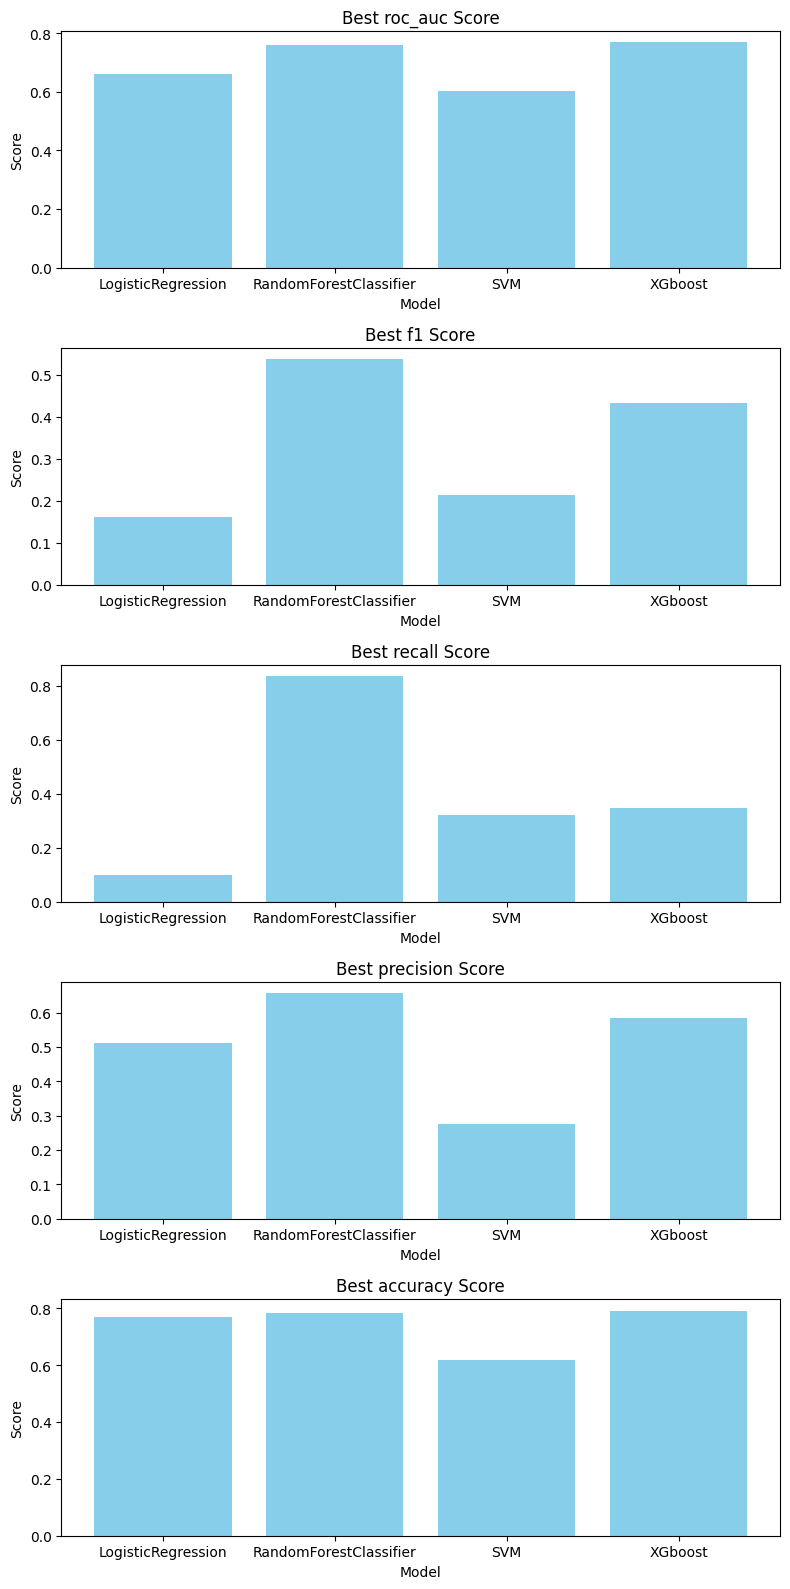

In [20]:
import matplotlib.pyplot as plt

# Dictionary containing model names as keys and their corresponding metric scores as values
data = {
    'LogisticRegression': {'roc_auc': 0.6590964323643316, 'f1': 0.16057872939115528, 'recall': 0.09925526207832372, 'precision': 0.5101890756302521, 'accuracy': 0.7692449319863137},
    'RandomForestClassifier': {'roc_auc': 0.7588553294608974, 'f1': 0.536563277286807, 'recall': 0.8348598882893118, 'precision': 0.6555903987611306, 'accuracy': 0.7821661677834679},
    'SVM': {'roc_auc': 0.6029664802027253, 'f1': 0.21415548574244525, 'recall': 0.32062229795828207, 'precision': 0.27511319852716526, 'accuracy': 0.6185238151821445},
    'XGboost': {'roc_auc': 0.7685304702360432, 'f1': 0.43271310994636253, 'recall': 0.34775079680646276, 'precision': 0.5841849050478845, 'accuracy': 0.791514003089451}
}

# Get the list of metrics and models from the data dictionary
metrics = list(data['LogisticRegression'].keys())
models = list(data.keys())

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 16))

# Plot scores for each metric
for i, metric in enumerate(metrics):
    scores = [data[model][metric] for model in models]  # Get scores for the current metric
    axes[i].bar(models, scores, color='skyblue')  # Plot bar chart for scores
    axes[i].set_title(f'Best {metric} Score')  # Set title for the subplot
    axes[i].set_xlabel('Model')  # Set label for x-axis
    axes[i].set_ylabel('Score')  # Set label for y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot


# **Conclusion**



Based on the provided data and considering the imbalance in the dataset, there are several key observations and potential areas for improvement:

Model Performance: The analysis indicates variations in performance metrics among different models. RandomForestClassifier and XGboost demonstrate relatively higher scores across most metrics compared to LogisticRegression and SVM. However, it's important to note that these models might be overfitting due to the imbalanced nature of the dataset.

Imbalanced Dataset: The dataset exhibits a significant class imbalance, with one class having a much larger representation than the other. This can lead to biased model training and inaccurate predictions, particularly for the minority class.

Potential Improvements:

Resampling Techniques: Implementing resampling techniques such as oversampling the minority class or undersampling the majority class can help balance the dataset.
Algorithm Selection: Explore algorithms that are less sensitive to class imbalance, such as ensemble methods like Random Forest with class weighting or boosting algorithms like XGBoost with appropriate hyperparameter tuning.
Evaluation Metrics: Instead of traditional accuracy, consider using evaluation metrics that are more suitable for imbalanced datasets, such as precision, recall, F1-score, or area under the ROC curve (ROC AUC).
Hyperparameter Tuning: Perform extensive hyperparameter tuning for each model to optimize performance while considering the imbalance issue.
Conclusion: In conclusion, while some models exhibit promising performance, the imbalance in the dataset poses a challenge to the reliability of the results. Implementing strategies to address this imbalance, such as resampling techniques and algorithm selection, is crucial for improving the overall effectiveness of the models. Additionally, fine-tuning hyperparameters and selecting appropriate evaluation metrics are essential steps towards building robust models capable of handling imbalanced datasets.